### Imports and settings

In [6]:
import pandas as pd
import numpy as np
import warnings
from typing import Dict, Iterator, Any
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import os
from tqdm.auto import tqdm
# register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [2]:
def iterate_dataframes(path: str) -> Iterator[pd.DataFrame]:
    """
    Iterates over all .csv files in path as pd.DataFrame
    """
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
        csvs = [path + x for x in os.listdir(path) if "csv" in x]
    
        for csv in tqdm(csvs):
            yield pd.read_csv(csv,  lineterminator='\n')

def aggregate_dataframe(df: pd.DataFrame) -> Dict[str, Any]:
    """
    Aggregates dataframe to dict.
    """
    df_la = df.groupby("language").count().reset_index()
    languages = df_la['language'].tolist()
    lang_counts = df_la['username'].tolist()
    unique_user_count = df['userid'].unique().shape[0]
    row_count = df.shape[0]
    duplicated_count = df.duplicated(subset="text", keep=False).sum()
    date = df.iloc[0]['tweetcreatedts'][:10]
    aggregation = {'unique_users': unique_user_count,
                  'row_count': row_count,
                  'text_duplicated_count': duplicated_count,
                  'date':date}
    aggregation = {**dict(zip(languages, lang_counts)), **aggregation}
    return aggregation
    
    
    

In [12]:
path = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/2023/"
agg_dicts_2023 = []

for df in iterate_dataframes(path):
    agg = aggregate_dataframe(df)
    agg_dicts_2023.append(agg)
    
    
df_agg_2023 = pd.DataFrame(agg_dicts_2023).fillna(0)
df_agg_2022.to_csv("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/2022_agg.csv")

100%|███████████████████████████████████████████████| 156/156 [03:13<00:00,  1.24s/it]


In [14]:
path = "/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/2022/"
agg_dicts_2022 = []

for df in iterate_dataframes(path):
    agg = aggregate_dataframe(df)
    agg_dicts_2022.append(agg)
    
    
df_agg_2022 = pd.DataFrame(agg_dicts_2022).fillna(0)
df_agg_2023.to_csv("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/2023_agg.csv")

100%|███████████████████████████████████████████████| 311/311 [11:28<00:00,  2.21s/it]


In [3]:
df_agg_2022 = pd.read_csv("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/2022_agg.csv")
df_agg_2023 = pd.read_csv("/Users/robinfeldmann/TopicAnalysisRUWTweets/Data/2023_agg.csv")
df_agg = pd.concat([df_agg_2022,df_agg_2023]).fillna(0)

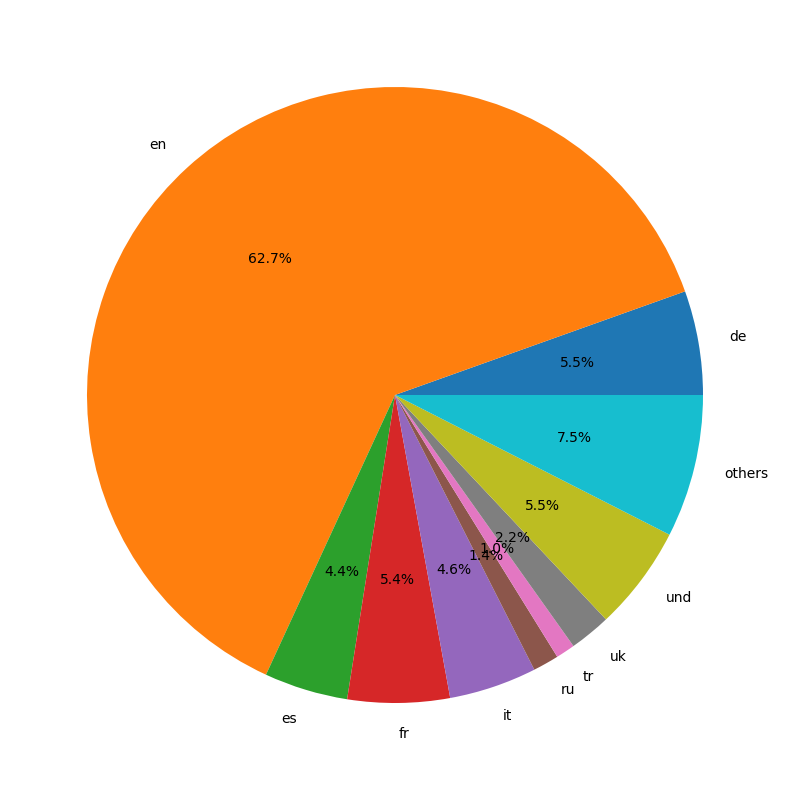

In [7]:
languages = np.array(['am', 'ar', 'bg', 'bn', 'ca', 'ckb', 'cs', 'cy', 'da', 'de', 'dv', 'el',
       'en', 'es', 'et', 'eu', 'fa', 'fi', 'fr', 'gu', 'hi', 'ht', 'hu', 'hy',
       'in', 'is', 'it', 'iw', 'ja', 'ka', 'kn', 'ko', 'lt', 'lv', 'ml', 'mr',
       'my', 'ne', 'nl', 'no', 'or', 'pa', 'pl', 'ps', 'pt', 'ro', 'ru', 'si',
       'sl', 'sr', 'sv', 'ta', 'te', 'th', 'tl', 'tr', 'uk', 'und', 'ur', 'vi',
       'zh','sd', 'km', 'lo', 'ug', 'bo'])
language_counts = [df_agg[la].sum() for la in languages]
language_freq = np.array([la_co/sum(language_counts) for la_co in language_counts])
selected_lang = language_freq > 0.01
others = sum(language_freq[~selected_lang])
languages = np.append(languages[selected_lang], "others")
freqs = np.append(language_freq[selected_lang], others)
fig, ax = plt.subplots()
ax.pie(freqs, labels=languages, autopct='%1.1f%%')
plt.show()

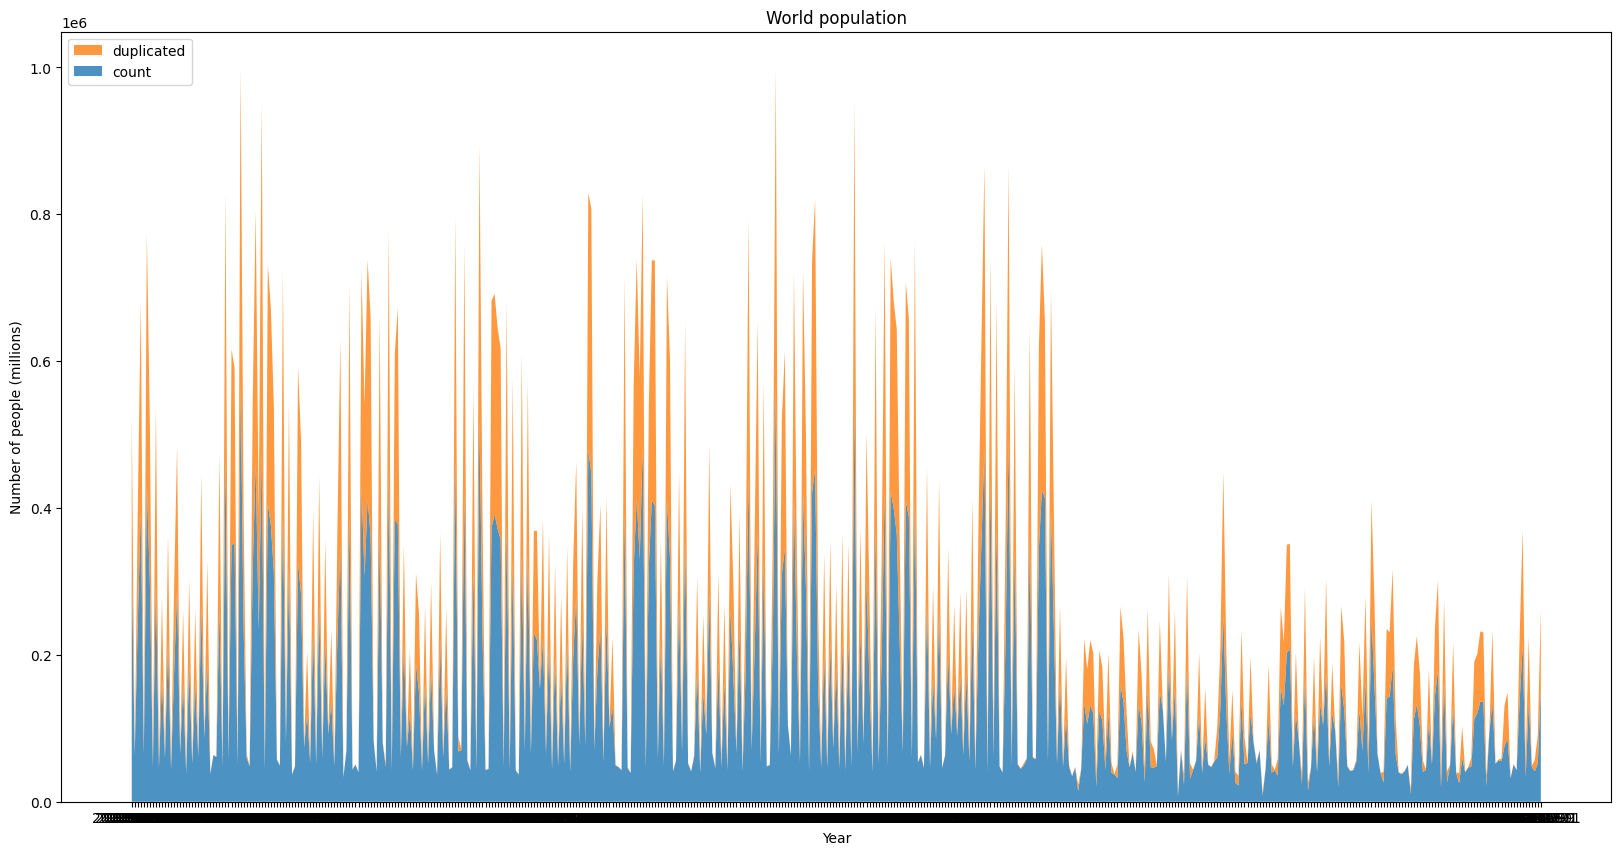

In [10]:
fig, ax = plt.subplots()
ax.stackplot(df_agg['date'], [df_agg['row_count'],df_agg['text_duplicated_count']],
             labels=['count','duplicated'], alpha=0.8)
ax.legend(loc='upper left', reverse=True)
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()


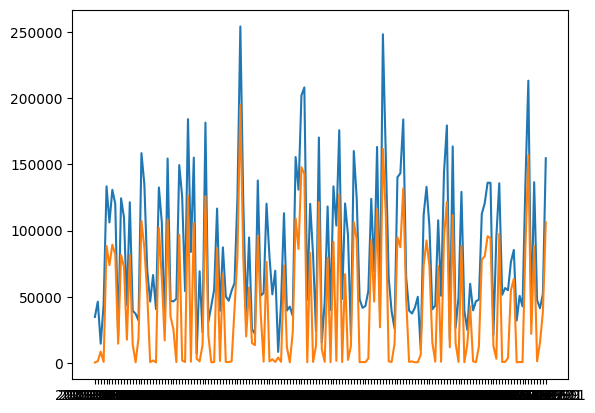

In [17]:
fig, ax = plt.subplots()
ax.plot(df_agg_2023['date'], df_agg_2023['row_count'])
ax.plot(df_agg_2023['date'], df_agg_2023['text_duplicated_count'])